# DATA311 Assignment 1
### Name: *Ali Akbari*
### UCID: *30010402*

Enter the filename below:

In [19]:
#CSV filename to compute values for 
filename = "t1.csv"                                        

Global imports & constants
* you should not need more imports than this

In [5]:
#Printed inline
#Import CSV & matplotlib libraries which are used for computing values 
#And for the histogram
%matplotlib inline                                          
import csv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams.update({'font.size': 10})

Code below opens the file 'filename' and reads in the data.

 Column:  | Minimum | Maximum | Average  | Standard Deviation | Most Common Word 
----------------------------------------------------------------------------------
 Column 1 |       1 |      16 |    8.941 |             4.8077 |               16 
----------------------------------------------------------------------------------
 Column:  | Minimum | Maximum | Average  | Standard Deviation | Most Common Word 
----------------------------------------------------------------------------------
 Column 2 |       1 |      16 |    8.941 |             4.8077 |               16 
----------------------------------------------------------------------------------
 Column:  | Minimum | Maximum | Average  | Standard Deviation | Most Common Word 
----------------------------------------------------------------------------------
 Column 3 |     n/a |     n/a |      n/a |             4.9497 |               16 
----------------------------------------------------------------------------------
 Column:  

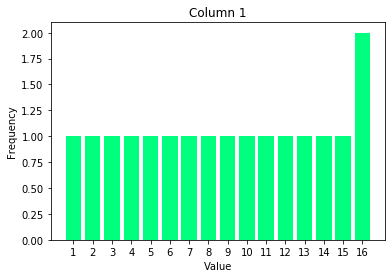

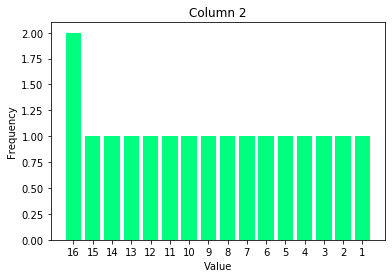

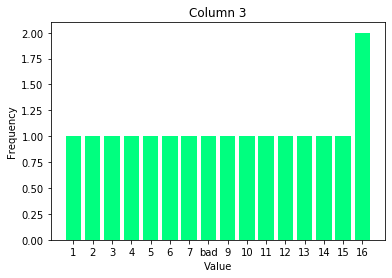

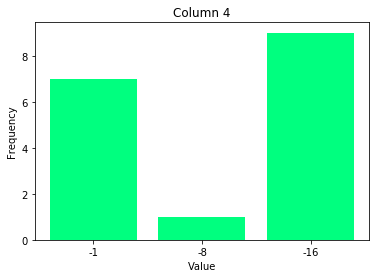

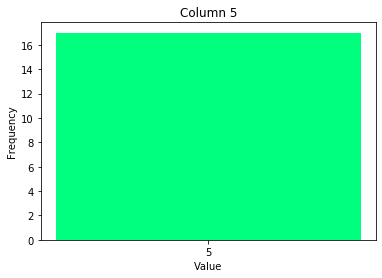

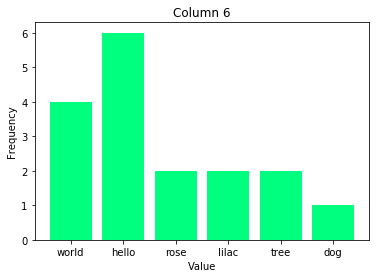

In [20]:
#Opening the csv file
with open(filename) as csvfile:
    reader = csv.reader(csvfile)
    #List for header of the file
    headerRow = []
    #headerRow is equal to the first row
    headerRow = next(reader)
    #temporary list
    temp = []
    #List for the column values
    colVals = []
    #print_header(headerRow)
    #Loop through the file (number of column times eg: headerRow length) and add all values of the column to the colVal
    #Which is a certain value of the Row with index i
    for i in range(len(headerRow)):
        for row in reader:
            #Making the column lists
            colVals.append(row[i])
        #Move back to the start of the file with seek method 
        csvfile.seek(0)
        #Just to skip the file header row 
        temp = next(reader)
        #Print the values in a table
        print_table(headerRow[i], colVals)
        #Increment i by 1
        i = i + 1
        #Removes all list elements so next column values can be added
        colVals.clear()
   
    #Loop through the file (number of column times eg: headerRow length) and add all values of the column to the colVal
    #Which is a certain value of the Row with index i
    for i in range(len(headerRow)):
        for row in reader:
            #Making the column lists
            colVals.append(row[i])
        #Move back to the start of the file with seek method 
        csvfile.seek(0)
        #Just to skip the file header row 
        temp = next(reader)
        
        altList = []
        #Sends the certain column to be graphed on the histogram
        #This portion break big data pieces to smaller 45 bar garphs to be read easily
        if len(colVals) > 45:
            k = 0
            aBool = True
            while aBool:
                j = 0
                while j < 45:
                    if k == 0:
                        altList.append(colVals[j])
                    else:
                        altList.append(colVals[k+j])
                    j += 1
                    if (k + j) == len(colVals):
                        aBool = False
                        break
                k += 45
                #Sent to print the 45 bars
                histGraph(headerRow[i], altList)
                #Clear the list for the next 45 bar list
                altList.clear()
        else:                    
            #If not big data pieces print the histogram normally with the column values passed in
            histGraph(headerRow[i], colVals)
        #Increment i by 1
        i = i + 1
        #Removes all list elements so next column values can be added
        colVals.clear()
        

Code below computes everything that needs to be computed and stores it in memory.
This code should not print anything.

In [7]:
#Function that finds the maximum value from the column
def findMax(colVals):
    valMax = 0.0
    aStr = 'n/a'
    for i in range(len(colVals)):
        try:
            if float(colVals[i]) > float(valMax):
                valMax = colVals[i]
        except ValueError:
            return aStr
        i = i + 1
    return valMax   

#Function that finds the minimum value from the column
def findMin(colVals):
    valMin = 99990000
    aStr = 'n/a'
    for i in range(len(colVals)):
        try:
            if float(colVals[i]) < float(valMin):
                valMin = colVals[i]
        except ValueError:
            return aStr
        i = i + 1
    return valMin
    
#Function that finds the average of the value from the column
def findAvg(colVals):
    valTotal= 0.0
    aStr = 'n/a'
    for i in range(len(colVals)):
        try:
            valTotal += float(colVals[i]) 
        except ValueError:
            return aStr
        i = i + 1
    return round((valTotal/len(colVals)), 3)
    
#Function that finds the standard deviation value from the column
def findStDev(colVals):
    mean = 0.0
    total = 0
    listOfElements = []
    result= 0.0
    aStr = 'n/a'
    
    for i in range(len(colVals)):
        try:
            total = total + float(colVals[i])
            listOfElements.append(i)
        except ValueError:
            continue

    if len(listOfElements) >= 2: 
        mean = total / (len(listOfElements))
        for j in listOfElements:
            result = result + ((float(colVals[j]) - mean)**2)
        result = ((result/(len(listOfElements)))**(0.5))
        return round(result, 4)
    else:
        return aStr

    
#Function that finds the most common value from the column
def findMostCom(colVals):
    indexNum = 0
    counter = 0
    for i in range(len(colVals)):
        if colVals.count(colVals[i]) > counter:
            counter = colVals.count(colVals[i])
            indexNum = i
    return colVals[indexNum]
    
#Function that finds the frequence of the value from the column
def findHisVal(colVals, aString):
    return colVals.count(aString)
    



Print the results in a nicely formatted table. Feel free to use the provided print_table() function.
For columns that contain at least one non-numeric value, report 'n/a' in Min/Max/Avg/std.avg columns.

In [8]:
#Function that prints out the table, take the column lists made above and the the header column name as aString
def print_table(aString, colVals):
    #Table list created which has the first Row of the the table and calls the calculation function above for the values 
    table = [["Column: ", "Minimum", "Maximum", "Average ", "Standard Deviation", "Most Common Word"],
             [aString, findMin(colVals), findMax(colVals), findAvg(colVals), findStDev(colVals), findMostCom(colVals)]]
    longest_cols = [
        (max([len(str(row[i])) for row in table]) + 0) for i in range(len(table[0]))
    ]
    #Format of the rows
    row_format = "|".join([" {:>" + str(longest_col) + "} " for longest_col in longest_cols])
    first = True
    #Prints the table with the format and prints dashes eg: ----
    for row in table:
        print(row_format.format(*row))
        print((sum(longest_cols) + (len(table[0]) - 0) * 3) * "-")
        first = False

        

Code below displays the histograms for each column (where applicable).

In [15]:
#Print the histogram, takes a string for the title of the graph( headerRow), 
#Takes column value list (colVals) to send to findHisVal to calculate the histogram values
def histGraph(headerRow, colVals):
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    plt.title(headerRow)
    for i in range (len(colVals)):
        x = colVals[i]
        plt.bar(x, findHisVal(colVals, colVals[i]), color="springgreen")
                
    #Plots the histogram after the loop    
    plt.show()
